In [134]:
import pandas as  pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()


In [135]:
#please use the attached csv file
df=pd.read_csv("appstore_games.csv")

In [136]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,Puzzle,11/7/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,Board,11/7/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,Board,11/7/2008,5/9/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,Puzzle,23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Board,Education",18/07/2008,22/07/2018


In [137]:
##droping the columns which are not usefull in this project 
df=df.drop(["URL","Subtitle","Icon URL","Description","Developer"],axis=1)

In [138]:
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,Puzzle,11/7/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,NaN,4+,EN,12328960.0,Games,Board,11/7/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,NaN,4+,EN,674816.0,Games,Board,11/7/2008,5/9/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,Puzzle,23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,NaN,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Board,Education",18/07/2008,22/07/2018


In [139]:
#replacing Nan with 0
df.fillna(0)

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,Puzzle,11/7/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,Games,Board,11/7/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,Games,Board,11/7/2008,5/9/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,Puzzle,23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Board,Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,1474626442,Stack Puzzle : Rise Tower,0.0,0.0,0.00,0,4+,EN,64795648.0,Games,"Entertainment,Casual",30/07/2019,30/07/2019
17003,1474919257,EachOther,0.0,0.0,0.00,0,4+,EN,110341120.0,Games,Family,1/8/2019,1/8/2019
17004,1474962324,Rabbit Vs Tortoise,0.0,0.0,0.00,0,4+,EN,23207936.0,Games,Strategy,3/8/2019,3/8/2019
17005,1474963671,FaTaLL,0.0,0.0,0.00,"9.99, 49.99, 3.99",4+,EN,196750336.0,Games,Action,1/8/2019,1/8/2019


In [ ]:
##Finding significant Genres

In [140]:
#creating a copy of required columns 
df_1=df[["Average User Rating","Genres"]].copy()

In [141]:
df_1.set_index("Average User Rating")

,Genres
Average User Rating,
4.0,Puzzle
3.5,Board
3.0,Board
3.5,Puzzle
3.5,"Board,Education"
...,...
NaN,"Entertainment,Casual"
NaN,Family
NaN,Strategy


In [142]:
df_1.fillna(0)

,Average User Rating,Genres
0,4.0,Puzzle
1,3.5,Board
2,3.0,Board
3,3.5,Puzzle
4,3.5,"Board,Education"
...,...,...
17002,0.0,"Entertainment,Casual"
17003,0.0,Family
17004,0.0,Strategy
17005,0.0,Action


In [143]:
df_1.set_index('Average User Rating')

,Genres
Average User Rating,
4.0,Puzzle
3.5,Board
3.0,Board
3.5,Puzzle
3.5,"Board,Education"
...,...
NaN,"Entertainment,Casual"
NaN,Family
NaN,Strategy


In [144]:
df_1.dropna()

,Average User Rating,Genres
0,4.0,Puzzle
1,3.5,Board
2,3.0,Board
3,3.5,Puzzle
4,3.5,"Board,Education"
...,...,...
16950,3.0,"Entertainment,Puzzle"
16956,5.0,"Entertainment,Action"
16962,5.0,Simulation
16967,5.0,Simulation


In [145]:
##taking the mean of the average ratings by grouping Genres
n=df_1.groupby("Genres")["Average User Rating"].mean().reset_index()

In [146]:
n

,Genres,Average User Rating
0,Action,4.119149
1,"Action,Books",4.500000
2,"Action,Business",3.500000
3,"Action,Education",NaN
4,"Action,Entertainment",4.122530
...,...,...
442,"Word,Education",5.000000
443,"Word,Entertainment",3.958333
444,"Word,Lifestyle",NaN
445,"Word,SocialNetworking",3.750000


In [149]:
n.dropna().reset_index()


,index,Genres,Average User Rating
0,0,Action,4.119149
1,1,"Action,Books",4.500000
2,2,"Action,Business",3.500000
3,4,"Action,Entertainment",4.122530
4,5,"Action,Food&Drink",4.500000
...,...,...,...
291,440,Word,4.107143
292,441,"Word,Books",4.500000
293,442,"Word,Education",5.000000
294,443,"Word,Entertainment",3.958333


In [156]:
##creating small sets of data for better visualization
r1=n.iloc[0:50]
r2=n.iloc[51:100]
r3=n.iloc[101:150]
r4=n.iloc[151:200]
r5=n.iloc[201:250]
r6=n.iloc[251:296]

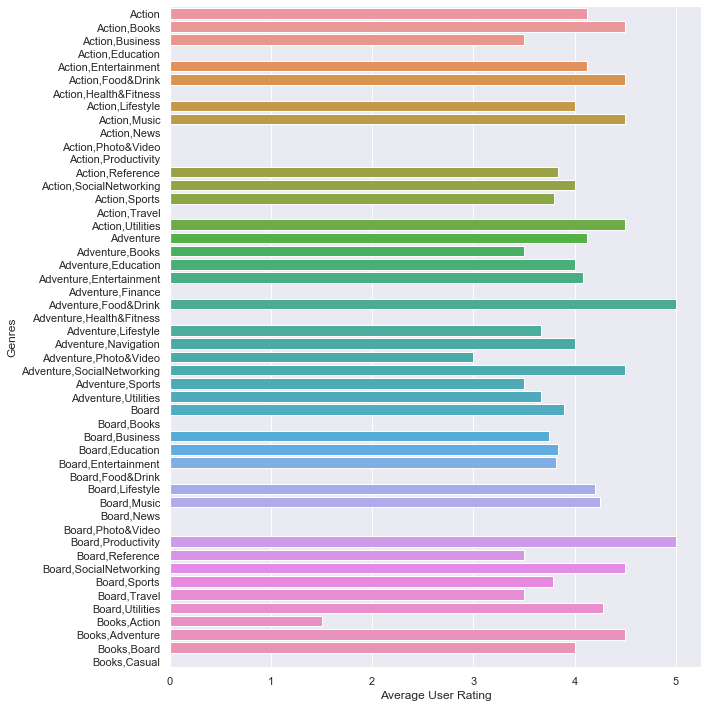

In [157]:
#Average User Rating vs Genres
sns.catplot(x="Average User Rating",y="Genres",data=r1,kind="bar",height=10)

THE INFERENCE WE CAN MAKE FROM ABOVE GRAPH IS USERS PREFER GAMES WHOSE GENRES ARE BOARD,PRODUCTIVITY,ADVENTURE,FOOD & DRINKS ALSO STRATEGY IS A COMMON GENRE

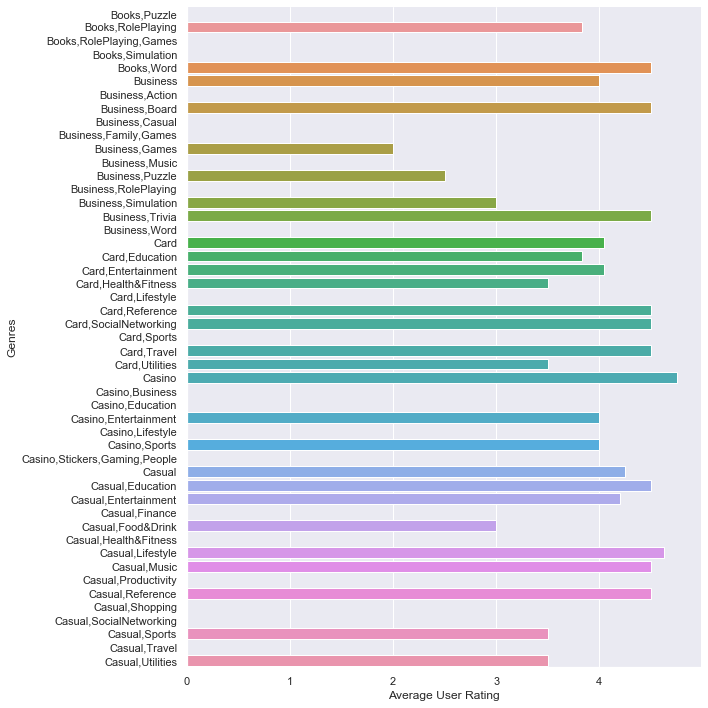

In [163]:
#Average User Rating vs Genres
sns.catplot(x="Average User Rating",y="Genres",data=r2,kind="bar",height=10)

THE INFERENCE WE CAN MAKE FROM ABOVE GRAPH IS USERS PREFER GAMES WHOSE GENRES IS CASINO ALSO STRATEGY IS A COMMON GENRE

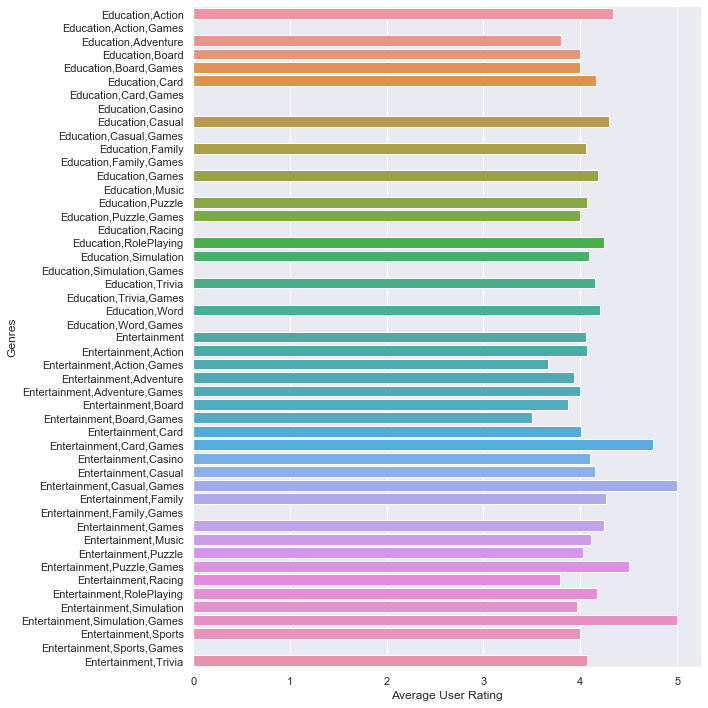

In [164]:
#Average User Rating vs Genres
sns.catplot(x="Average User Rating",y="Genres",data=r3,kind="bar",height=10)

THE INFERENCE WE CAN MAKE FROM ABOVE GRAPH IS USERS PREFER GAMES WHOSE GENRES ARE ENTERTAINMENT,CASUAL,SIMULATION ALSO STRATEGY IS A COMMON GENRE

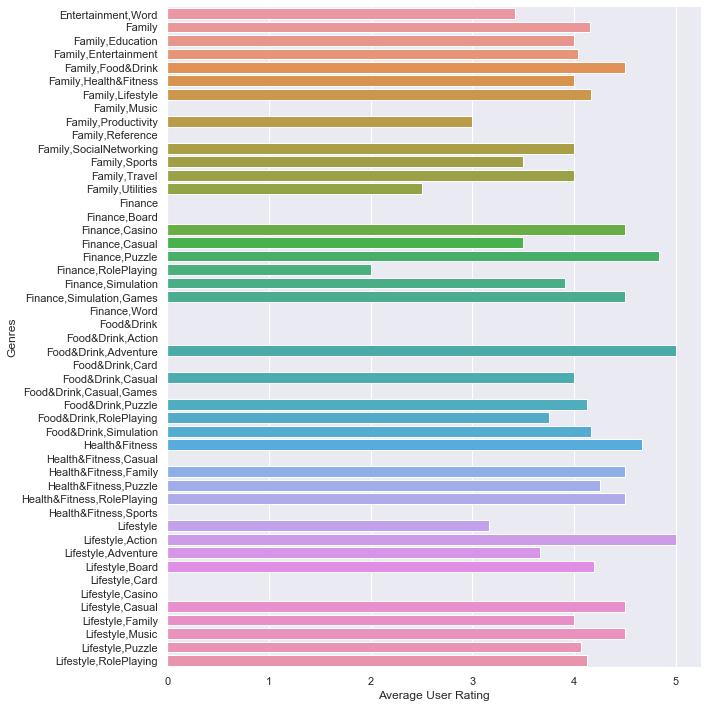

In [165]:
#Average User Rating vs Genres
sns.catplot(x="Average User Rating",y="Genres",data=r4,kind="bar",height=10)

THE INFERENCE WE CAN MAKE FROM ABOVE GRAPH IS USERS PREFER GAMES WHOSE GENRES ARE FOOD &DRINKS,ADVENTURE,LIFESTYLE ,ACTION ALSO STRATEGY IS A COMMON GENRE

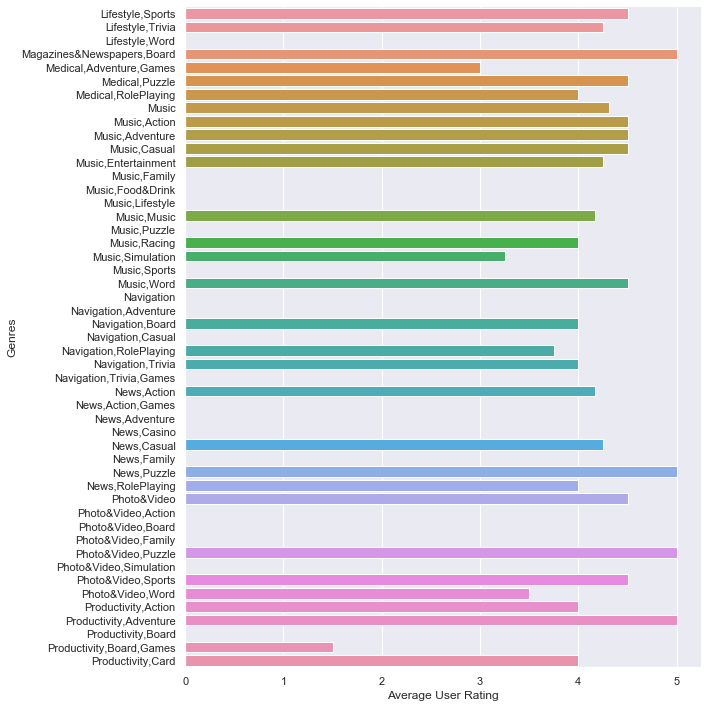

In [166]:
#Average User Rating vs Genres
sns.catplot(x="Average User Rating",y="Genres",data=r5,kind="bar",height=10)

THE INFERENCE WE CAN MAKE FROM ABOVE GRAPH IS USERS PREFER GAMES WHOSE GENRES ARE BOARD,PRODUCTIVITY,ADVENTURE,MAGZINES &NEWSPAPER ,PUZZLE , PHOTO&VIDEO,NEWS ALSO STRATEGY IS A COMMON GENRE

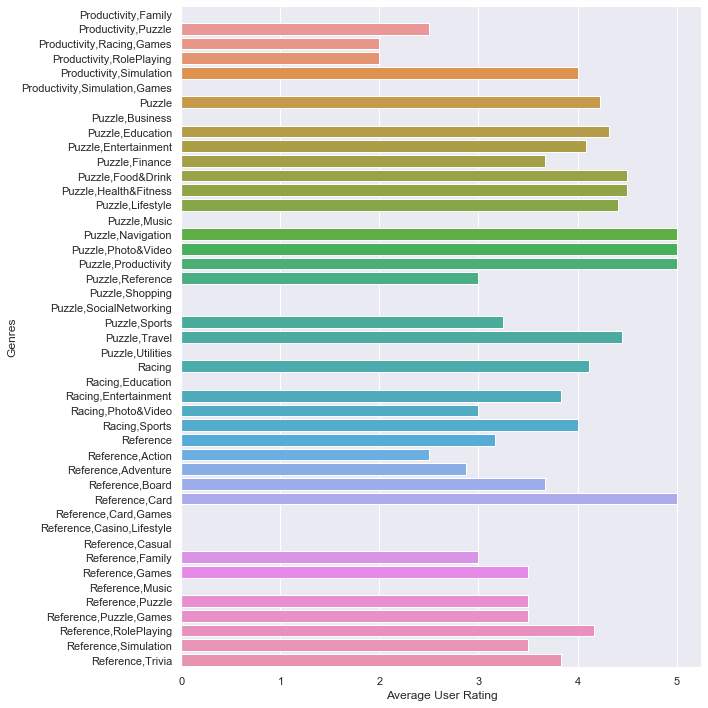

In [167]:
#Average User Rating vs Genres
sns.catplot(x="Average User Rating",y="Genres",data=r6,kind="bar",height=10)

THE INFERENCE WE CAN MAKE FROM ABOVE GRAPH IS USERS PREFER GAMES WHOSE GENRES ARE PUZZLE,NAVIGATION,REFERENCE,CARD,PHOTO& VIDEO,PRODUCTIVITY ALSO STRATEGY IS A COMMON GENRE

In [ ]:
##Which genres have higher user ratings

In [168]:
#creating a copy of required columns
t=df[["Average User Rating","Primary Genre"]].copy()

In [169]:
t

,Average User Rating,Primary Genre
0,4.0,Games
1,3.5,Games
2,3.0,Games
3,3.5,Games
4,3.5,Games
...,...,...
17002,NaN,Games
17003,NaN,Games
17004,NaN,Games
17005,NaN,Games


In [170]:
t.dropna()

,Average User Rating,Primary Genre
0,4.0,Games
1,3.5,Games
2,3.0,Games
3,3.5,Games
4,3.5,Games
...,...,...
16950,3.0,Games
16956,5.0,Games
16962,5.0,Games
16967,5.0,Games


In [171]:
##taking the mean of the average ratings by grouping Primary Genres
t=t.groupby("Primary Genre")["Average User Rating"].mean().reset_index()

In [172]:
t

,Primary Genre,Average User Rating
0,Book,4.300000
1,Business,3.000000
2,Education,4.152174
3,Entertainment,3.831522
4,Finance,4.062500
5,Food & Drink,5.000000
6,Games,4.065903
7,Health & Fitness,4.500000
8,Lifestyle,3.125000
9,Medical,3.000000


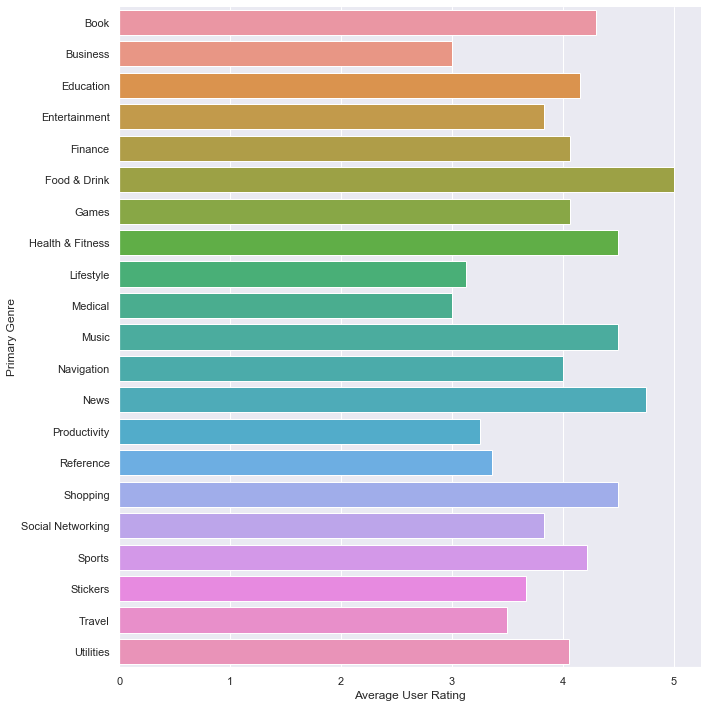

In [176]:
#Average User Rating vs Primary Genres
sns.catplot(x="Average User Rating",y="Primary Genre",data=t,kind="bar",height=10)

THE INFERENCE WE CAN MAKE FROM ABOVE GRAPH IS USERS PREFER GAMES WHOSE GENRE IS FOOD & DRINKS

In [ ]:
##trend of user rating based on pricing

In [175]:
##creating a copy of required columns
k=df[["Average User Rating","Price"]].copy()

In [68]:
k

,Average User Rating,Price
0,4.0,2.99
1,3.5,1.99
2,3.0,0.00
3,3.5,0.00
4,3.5,2.99
...,...,...
17002,NaN,0.00
17003,NaN,0.00
17004,NaN,0.00
17005,NaN,0.00


In [69]:
k.fillna(0)

,Average User Rating,Price
0,4.0,2.99
1,3.5,1.99
2,3.0,0.00
3,3.5,0.00
4,3.5,2.99
...,...,...
17002,0.0,0.00
17003,0.0,0.00
17004,0.0,0.00
17005,0.0,0.00


In [72]:
##taking the mean of the average ratings by grouping Primary Genres
k=k.groupby("Average User Rating")["Price"].mean().reset_index()

In [73]:
k

,Average User Rating,Price
0,1.0,2.422143
1,1.5,0.631000
2,2.0,0.391013
3,2.5,0.392776
4,3.0,0.459397
5,3.5,0.601438
6,4.0,0.677067
7,4.5,0.576589
8,5.0,0.458172


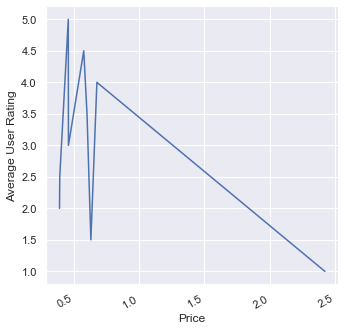

In [94]:
#Average User Rating vs Price
g = sns.relplot(x="Price", y="Average User Rating", kind="line", data=k)
g.fig.autofmt_xdate()


THE INFERENCE WE CAN MAKE FROM ABOVE GRAPH IS USERS PREFER TO RATE ABOVE 4 FOR THE GAMES HAVING PRICE IN BETWEEN
.25 TO 0.7 USD.AND ALSO THEY RATE BELOW 1 FOR GAMES HAVING PRICE MORE THEN 2.5 USD(GENERALLY IT DEPENDS ON THE GAME BUT WE ARE TRYING TO GET A DIFFERENT VIEW)

THE INFERENCE OF ALL THE STATEMENTS IS 
USE PRFER GAMES OF GENRES PRODUCTIVITY,ADVENTURE ,PUZZLE,BOARD,PHOTO&VIDEO.
                   PRIMARY GENRE IS FOOD & DRINKS.
                   PRICE BETWEEN 0.25 TO 0.7 USD.